In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#What is the overall sales trend....?
#what are the top 10 porducts by sales....?
#what are the selling porduct....?
#which is the most profitable category and sub_category...?

In [3]:
df = pd.read_excel('C:/Users/acre/Downloads/superstore_sales.xlsx')

In [4]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [5]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [4]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


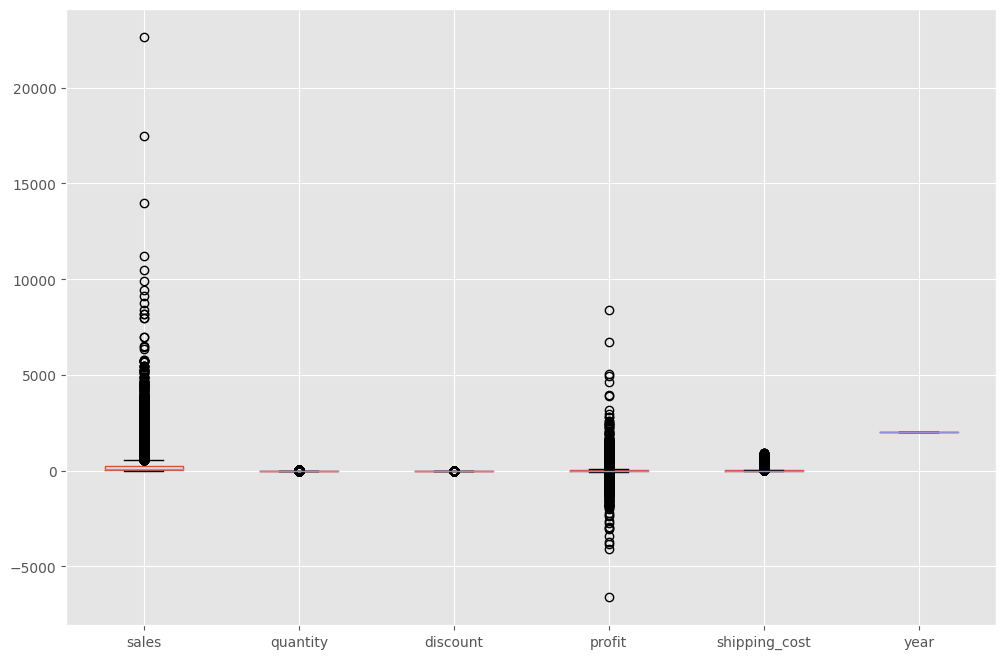

In [9]:
df.boxplot()
plt.show()

In [10]:
for x in ['sales','profit']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [11]:
df.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             5655
quantity             0
discount             0
profit            9755
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [12]:
df = df.dropna(axis = 0)

In [13]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [14]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [15]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [16]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df['month_year']

1        2011-01
2        2011-01
3        2011-01
4        2011-01
5        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 40298, dtype: object

In [17]:
df_month_year = df.groupby(['month_year']).sum()['sales'].reset_index()
df_month_year

C:\Users\acre\AppData\Local\Temp\ipykernel_4260\73027730.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month_year = df.groupby(['month_year']).sum()['sales'].reset_index()


,month_year,sales
0,2011-01,32142.94356
1,2011-02,31727.01408
2,2011-03,42811.37450
3,2011-04,40878.04078
4,2011-05,45832.73382
5,2011-06,69022.26518
6,2011-07,39686.92092
7,2011-08,67603.93434
8,2011-09,76927.71420
9,2011-10,55195.90672


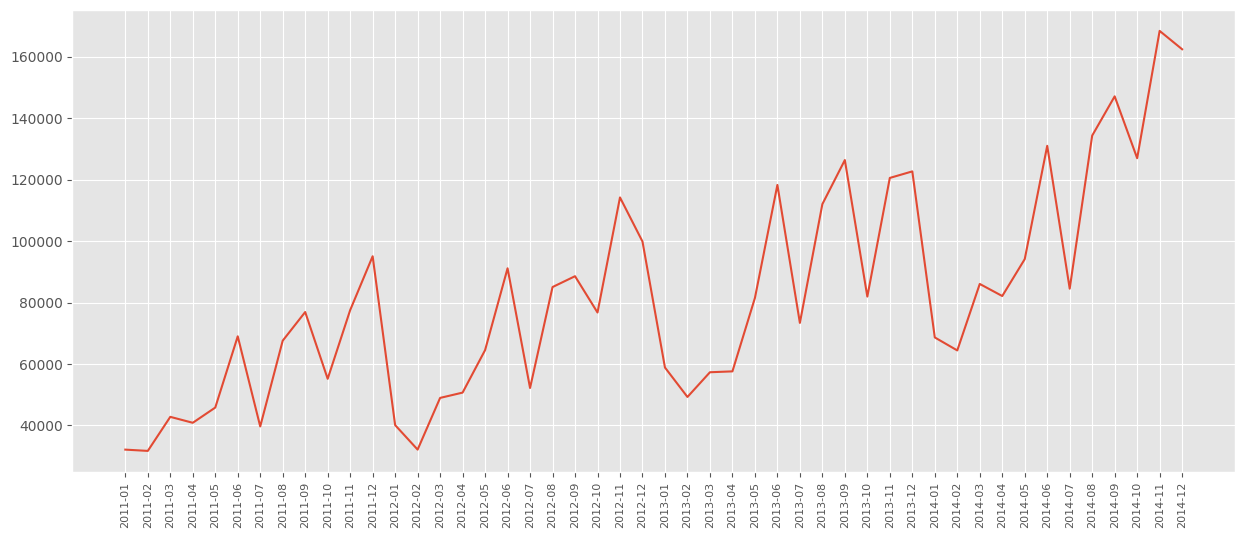

In [18]:
plt.figure(figsize=(15,6))
plt.plot(df_month_year['month_year'],df_month_year['sales'])
plt.xticks(rotation='vertical',size=8)
plt.show()

In [19]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,2011,2011-01


In [20]:
produc_by_sales= pd.DataFrame(df.groupby('product_name').sum()['sales'])
produc_by_sales = produc_by_sales.sort_values('sales',ascending=False)
produc_by_sales[:10]

C:\Users\acre\AppData\Local\Temp\ipykernel_4260\3229059961.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  produc_by_sales= pd.DataFrame(df.groupby('product_name').sum()['sales'])


,sales
product_name,
"Eldon File Cart, Single Width",12316.9297
"Rogers File Cart, Single Width",9772.1735
"Smead File Cart, Single Width",9408.1638
"Tenex File Cart, Single Width",9339.1448
"Smead File Cart, Blue",7218.6261
"Fellowes File Cart, Wire Frame",7213.1382
"Boston Canvas, Fluorescent",6920.5110
"Office Star Rocking Chair, Set of Two",6802.4860
Staples,6760.3600


In [21]:
most_produc_by_quant= pd.DataFrame(df.groupby('product_name').sum()['quantity'])
most_produc_by_quant = most_produc_by_quant.sort_values('quantity',ascending=False)
most_produc_by_quant[:10]

C:\Users\acre\AppData\Local\Temp\ipykernel_4260\2613131682.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_produc_by_quant= pd.DataFrame(df.groupby('product_name').sum()['quantity'])


,quantity
product_name,
Staples,868
"Cardinal Index Tab, Clear",337
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Sanford Pencil Sharpener, Water Color",231
"Stanley Pencil Sharpener, Water Color",228
"Acco Index Tab, Clear",228
"Sanford Markers, Water Color",179


In [22]:
df.head()



,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,2011,2011-01


In [23]:
category_and_sub_category= df.groupby(['category','sub_category']).sum()
category_and_sub_category

C:\Users\acre\AppData\Local\Temp\ipykernel_4260\212572529.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_and_sub_category= df.groupby(['category','sub_category']).sum()


sales  quantity  discount       profit  \
category        sub_category                                                  
Furniture       Bookcases     242694.00140      2104   116.780  22746.82900   
                Chairs        411372.67150      5930   313.470  36387.58020   
                Furnishings   259853.53480      9193   404.680  35755.22950   
                Tables         50162.48790       375    36.490   1332.70710   
Office Supplies Appliances    150293.85670      2786   118.710  21504.75780   
                Art           323241.46940     14842   522.400  52779.44800   
                Binders       273096.65480     19777  1015.240  47164.85320   
                Envelopes     149553.99080      7680   297.750  25854.69630   
                Fasteners      82519.42990      8332   338.370  11545.93810   
                Labels         69505.55000      9246   312.590  13377.37190   
                Paper         207075.44070     11835   364.260  48022.82900   
                Storage       476737.96740     11429   481.880  45844.38830   
                Supplies      181519.37770      7577   270.390  25034.11850   
Technology      Accessories   309270.45720      7292   266.540  43415.67290   
                Copiers       208036.33714      1504    69.296  22396.98514   
                Machines      144106.28430      1650    92.440  14614.67800   
                Phones        390155.35470      5431   252.960  43002.56040   

                              shipping_cost      year  
category        sub_category                           
Furniture       Bookcases         26305.670   1881988  
                Chairs            44329.431   4218851  
                Furnishings       27910.011   5700107  
                Tables             5399.210    346219  
Office Supplies Appliances        17642.820   1948314  
                Art               35641.267   9427855  
                Binders           29482.126  11831200  
                Envelopes         16163.436   4707932  
                Fasteners          8983.598   4860889  
                Labels             7743.455   5223152  
                Paper             22514.177   6829320  
                Storage           51018.664   7880018  
                Supplies          19684.872   4607283  
Technology      Accessories       34493.813   4732020  
                Copiers           21459.426   1523699  
                Machines          15336.788   1457257  
                Phones            42064.389   3934952

In [24]:
profitt = df.groupby(['category','sub_category']).sum()['profit']

C:\Users\acre\AppData\Local\Temp\ipykernel_4260\2214467344.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profitt = df.groupby(['category','sub_category']).sum()['profit']


In [25]:
profitt

category         sub_category
Furniture        Bookcases       22746.82900
                 Chairs          36387.58020
                 Furnishings     35755.22950
                 Tables           1332.70710
Office Supplies  Appliances      21504.75780
                 Art             52779.44800
                 Binders         47164.85320
                 Envelopes       25854.69630
                 Fasteners       11545.93810
                 Labels          13377.37190
                 Paper           48022.82900
                 Storage         45844.38830
                 Supplies        25034.11850
Technology       Accessories     43415.67290
                 Copiers         22396.98514
                 Machines        14614.67800
                 Phones          43002.56040
Name: profit, dtype: float64